In [1]:
import warnings
warnings.filterwarnings('ignore')

import scipy.io.wavfile as file
import IPython.display as ipd

from utils import *
from ola import OLA

In [2]:
in_file_path = '_input/test.wav'
out_file_path = '_output/test.wav'

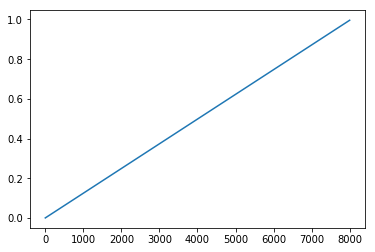

In [3]:
tester = OLA()
# using some response
response = tester.lin_resp(tester.coef_no)
# response = 1- tester.lowpass_resp(tester.coef_no)
# computing frequencies corresponding to coefficient
freqs = [i * tester.sample_rate / (2 * (tester.coef_no - 1)) for i in range(tester.coef_no)]

# printing response function
plt.plot(freqs, response)
plt.show()

In [4]:
base_file_name = os.path.basename(in_file_path).split('.')[0]
sr, w = file.read(in_file_path)
w = w.astype('float')
if np.mean(w**2) < 1:
    w = w * 2**15
w_out, proc_time = tester.test(w, response)
w_out = w_out.astype('int16')
# w_out = w_out / 2**15
file.write(out_file_path, sr, w_out)
print('file {} is processed, time: {}'.format(base_file_name, proc_time))

file test is processed, time: 0.004237651824951172


In [5]:
if np.mean(w**2) < 1:
    w = w * 2**15

In [6]:
ipd.Audio(w, rate=sr)

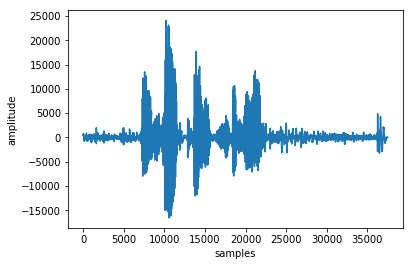

In [7]:
plot_waveform(w, 0, len(w))

In [8]:
ipd.Audio(w_out, rate=sr)

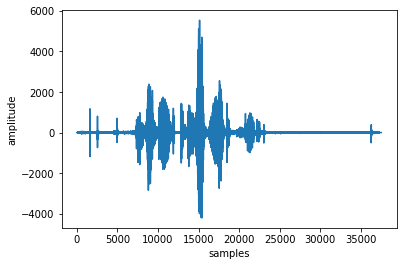

In [9]:
plot_waveform(w_out, 0, len(w_out))